In [ ]:
%pip install numpy==2.2.3 pandas==2.2.3 matplotlib==3.10.0 statsmodels==0.14.4

A time series is a sequence of data points collected over time, typically at regular intervals (E.g. stock prices, weather, or sales figures over a specified period). Time series data is characterized by its chronological order, which allows for the analysis of trends, patterns, and seasonal variations.

## Dates in Python

In [1]:
from datetime import datetime, timedelta
import pandas as pd

now = datetime.now()
now.day

custom_date = datetime(2023, 5, 17, 15, 30, 0)
custom_date.strftime('%d-%m-%y')

date_str = "17-05-2023 21:15:13"
datetime.strptime(date_str, '%d-%m-%Y %H:%M:%S')

now + timedelta(hours=100)

from datetime import date
from dateutil.relativedelta import relativedelta
date(2020, 5, 15) + relativedelta(months=5)

unix = 17030299383
datetime.utcfromtimestamp(unix)

C:\Users\marti\AppData\Local\Temp\ipykernel_21484\3993331154.py:20: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  datetime.utcfromtimestamp(unix)


datetime.datetime(2509, 9, 1, 22, 43, 3)

## Time Series in pandas

In [63]:
pd.Timestamp("2024-02-11")

pd.Timestamp.now(tz="UTC")

date_range = pd.date_range(start="2024-01-01", periods=12, freq="ME")

date_range.to_period('M').to_timestamp('M')

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [77]:
data = {"date_str": ["2023-01-01", "2023-06-15", "2023-12-31"]}
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df["date_str"])

df["date_utc"] = df["date"].dt.tz_localize("UTC")  # Set UTC time zone
df["date_ny"] = df["date_utc"].dt.tz_convert("America/New_York") 
df["date_ny"]

df[(df["date"] >= "2023-01-01") & (df['date'] < "2023-06-30")]

df["year"] = df['date'].dt.year

(df["date"] - df["date"].min()).dt.days

0      0
1    165
2    364
Name: date, dtype: int64

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=365, freq="D")  # Daily frequency
data = {"date": date_range, "value": np.random.randint(10, 100, size=len(date_range))}
df = pd.DataFrame(data)

df = df.set_index('date')

df.asfreq('h')

df.resample(rule='YE').sum()

df.groupby(pd.Grouper(freq="W-MON")).mean()

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=12, freq="ME")
sales = np.random.randint(100, 500, size=len(date_range))

df = pd.DataFrame({"date": date_range, "sales": sales}).set_index("date")

print(df["sales"])
print(df["sales"].shift(1))
print(df["sales"].shift(-1))

## Time Series Components

The **level** is the baseline component that is present in any time series. Plotted without other components, it would be a straight line. 

A **trend** represents a long-term increase or decrease in the data.

A **seasonality** denotes that a time series is affected by one or more seasonal factors of a fixed and known period, such as the time of the year.

A **cycle** occurs when there are rises and falls in the data that are not of a fixed frequency and lasts multiple years, usually due to economic conditions.

The **error** component is the residual unexplainable component that "remains" after accounting for the other components.

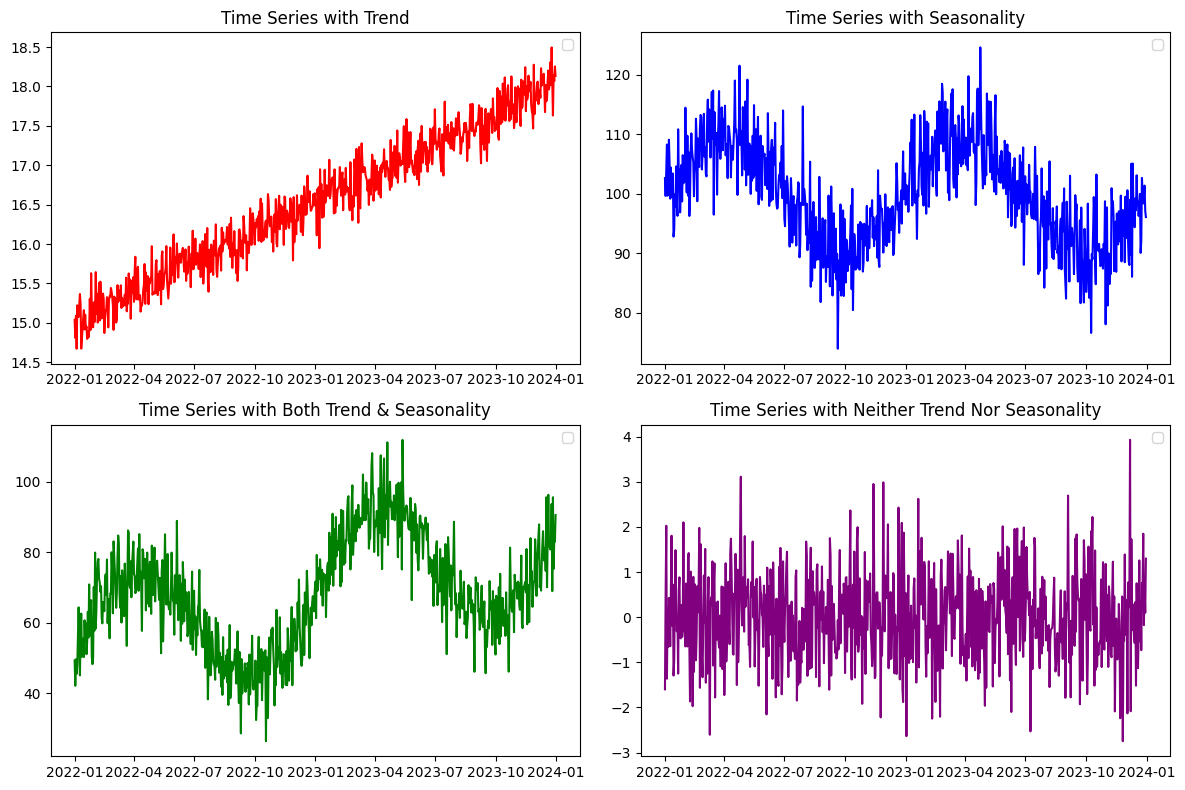

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.simplefilter('ignore', UserWarning)

# Set seed for reproducibility
np.random.seed(42)

# Generate a date range (daily observations over two years)
date_range = pd.date_range(start="2022-01-01", periods=730, freq="D")

# 1️⃣ Time Series with Seasonality Only (e.g., Monthly Temperature Cycle)
seasonality = 100 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 5, 730)

# 2️⃣ Time Series with Trend Only
trend = np.linspace(15, 18, 730) + np.random.normal(0, 0.2, 730)

# 3️⃣ Time Series with Both Trend & Seasonality (e.g., Sales Data)
trend_seasonality = (50 + 0.05 * np.arange(730) +
                     20 * np.sin(2 * np.pi * date_range.dayofyear / 365) +  # Stronger seasonality
                     np.random.normal(0, 7, 730))

# 4️⃣ Time Series with Neither Trend nor Seasonality (Pure White Noise)
white_noise = np.random.normal(0, 1, 730)  # Random values with no pattern

# Create a DataFrame for easy handling
df = pd.DataFrame({
    "Date": date_range,
    "Seasonality": seasonality,
    "Trend": trend,
    "Trend + Seasonality": trend_seasonality,
    "White Noise": white_noise
})
df.set_index("Date", inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df["Trend"], label="", color="red")
plt.title("Time Series with Trend")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df["Seasonality"], label="", color="blue")
plt.title("Time Series with Seasonality")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df["Trend + Seasonality"], label="", color="green")
plt.title("Time Series with Both Trend & Seasonality")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df["White Noise"], label="", color="purple")
plt.title("Time Series with Neither Trend Nor Seasonality")
plt.legend()

plt.tight_layout()
plt.show()

# Ciclo (difficile da vedere in un grafico)
# Q: una time series può avere più periodi stagionali? Esempio?

## Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series.

The autocorrelation function (ACF) is used to see how the correlations change depending on the lag.

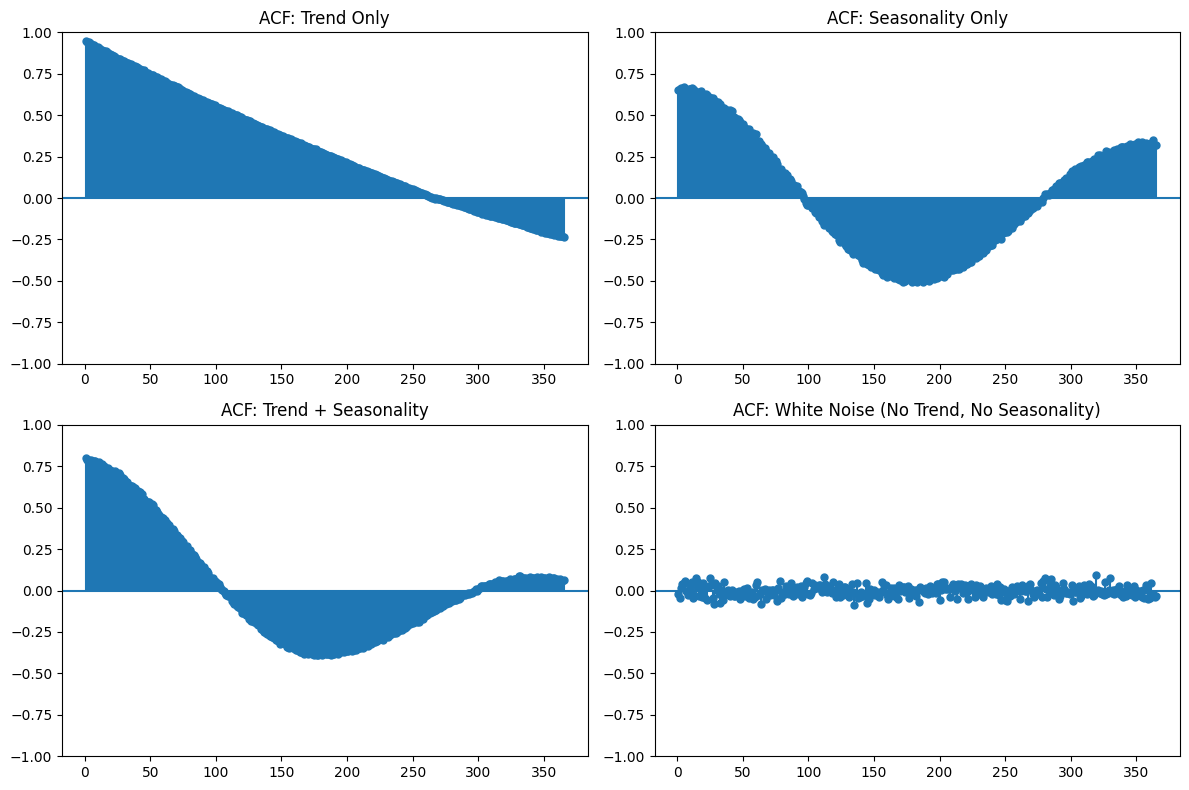

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_acf(df["Trend"], lags=365, alpha=None, zero=False, ax=axes[0, 0])
axes[0, 0].set_title("ACF: Trend Only")

plot_acf(df['Seasonality'], lags=365, alpha=None, zero=False, ax=axes[0, 1])
axes[0, 1].set_title("ACF: Seasonality Only")

plot_acf(df["Trend + Seasonality"], lags=365, alpha=None, zero=False, ax=axes[1, 0])
axes[1, 0].set_title("ACF: Trend + Seasonality")

plot_acf(df["White Noise"], lags=365, alpha=None, zero=False, ax=axes[1, 1])
axes[1, 1].set_title("ACF: White Noise (No Trend, No Seasonality)")

plt.tight_layout()
plt.show()

## Time Series Transformations

If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful. In general, making the size of the seasonal variation about the same across the whole series makes the forecasting model simpler.

### Logarithmic Transformation

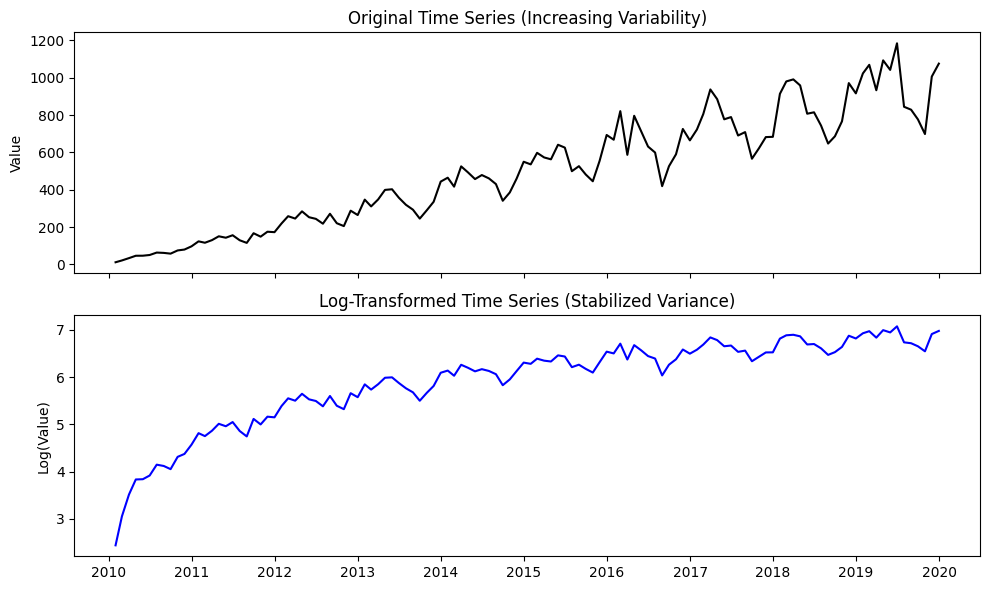

In [31]:
np.random.seed(42)

date_range = pd.date_range("2010-01", periods=120, freq="ME")

trend = np.linspace(10, 1000, 120)

seasonality = (0.2 * trend) * np.sin(2 * np.pi * date_range.month / 12)

noise = np.random.normal(0, 0.1 * trend, 120)

time_series = trend + seasonality + noise

log_time_series = np.log(time_series)

df = pd.DataFrame({"Date": date_range, "Original": time_series, "Log_Transformed": log_time_series})
df.set_index("Date", inplace=True)

# Plot original and log-transformed series
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Original series
axes[0].plot(df.index, df["Original"], label="Original Series", color="black")
axes[0].set_title("Original Time Series (Increasing Variability)")
axes[0].set_ylabel("Value")

# Log-transformed series
axes[1].plot(df.index, df["Log_Transformed"], label="Log-Transformed Series", color="blue")
axes[1].set_title("Log-Transformed Time Series (Stabilized Variance)")
axes[1].set_ylabel("Log(Value)")

plt.tight_layout()
plt.show()

### Moving Averages

A moving average of order $m$ is an estimate of the trend-cycle at time $t$, obtained by averaging values of the time series within $k$ periods of $t$, where $k = (m - 1) / 2$. E.g. a 3-MA averages the middle observation, one observation before and one after. Averaging eliminates some of the randomness in the data, leaving a smoother time series.

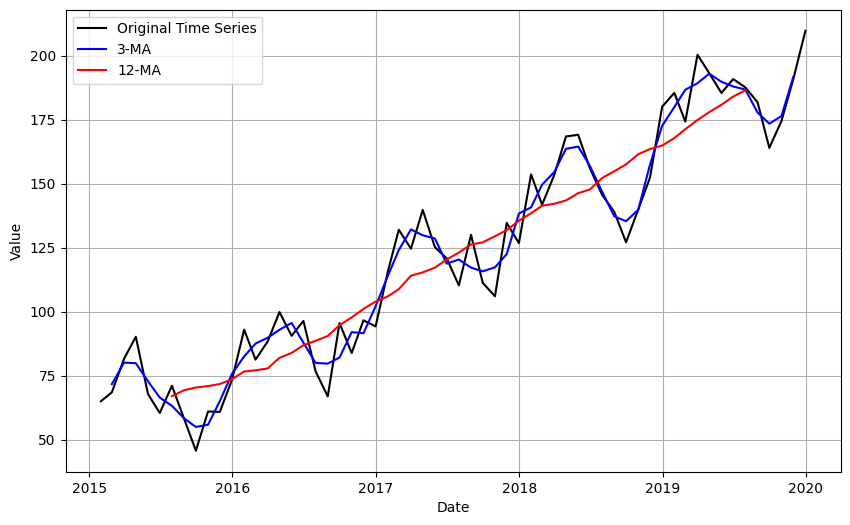

In [41]:
np.random.seed(42)

date_range = pd.date_range(start="2015-01", periods=60, freq="ME")

trend = np.linspace(50, 200, 60)

seasonality = 20 * np.sin(2 * np.pi * date_range.month /12)

noise = np.random.normal(0, 10, 60)

time_series = trend + seasonality + noise

df = pd.DataFrame({'Date': date_range, 'Value': time_series})
df.set_index('Date', inplace=True)

df["MA_3"] = df["Value"].rolling(window=3, center=True).mean()
df["MA_12"] = df["Value"].rolling(window=12, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Value"], label="Original Time Series", color="black")
plt.plot(df.index, df["MA_3"], label="3-MA", color="blue")
plt.plot(df.index, df["MA_12"], label="12-MA", color="red")

plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

## Time Series Decomposition

Assuming an additive decomposition, a time series can be written as $Y = S + T + R$, where $Y$ is the data, $S$ is the seasonal component, $T$ is the trend-cycle component, and $R$ is the remainder component. Assuming a multiplicative decomposition, we could write $Y = S * T * R$.

An additive decomposition is appropriate if the magnitude of seasonal/trend-cycle variations does not vary with the level of the time series. When the variations are proportional to the level of the time series, then a multiplicative decomposition is more suitable.

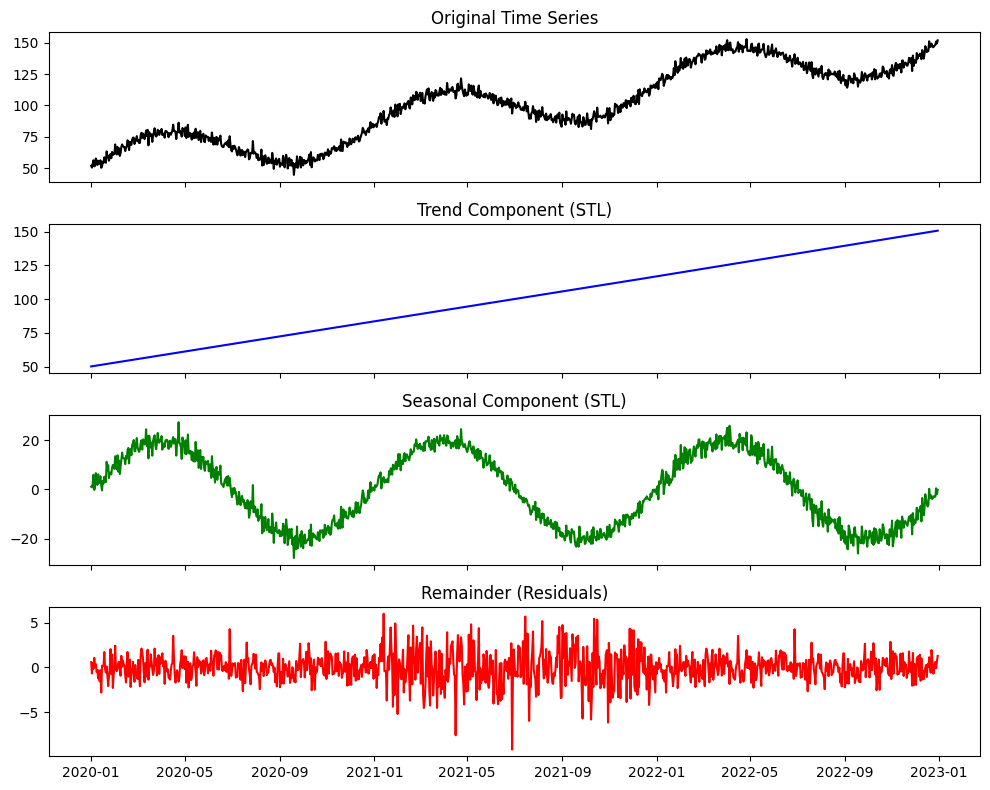

In [51]:
from statsmodels.tsa.seasonal import STL

np.random.seed(42)

date_range = pd.date_range(start="2020-01-01", periods=1095, freq="D")

trend = np.linspace(50, 150, 1095)
seasonality = 20 * np.sin(2 * np.pi * date_range.dayofyear / 365)
noise = np.random.normal(0, 3, 1095)

time_series = trend + seasonality + noise

df = pd.DataFrame({"Date": date_range, "Value": time_series})
df.set_index('Date', inplace=True)

stl = STL(df["Value"], period=365)
decomposition = stl.fit()

trend_stl = decomposition.trend
seasonal_stl = decomposition.seasonal
residual_stl = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(df.index, df["Value"], label="Original", color="black")
axes[0].set_title("Original Time Series")

axes[1].plot(df.index, trend_stl, label="Trend", color="blue")
axes[1].set_title("Trend Component (STL)")

axes[2].plot(df.index, seasonal_stl, label="Seasonality", color="green")
axes[2].set_title("Seasonal Component (STL)")

axes[3].plot(df.index, residual_stl, label="Residuals", color="red")
axes[3].set_title("Remainder (Residuals)")

plt.tight_layout()
plt.show()

## Forecasting

### Naive Methods

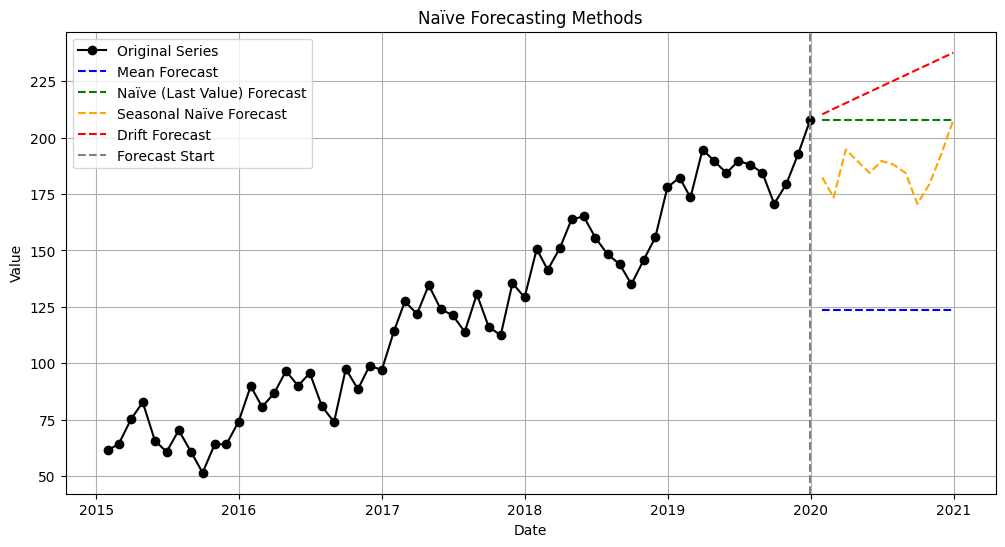

In [59]:
np.random.seed(42)

date_range = pd.date_range(start="2015-01", periods=60, freq="ME")

trend = np.linspace(50, 200, 60)

seasonality = 15 * np.sin(2 * np.pi * date_range.month / 12)

noise = np.random.normal(0, 8, 60)

time_series = trend + seasonality + noise

df = pd.DataFrame({"Date": date_range, "Value": time_series})
df.set_index("Date", inplace=True)

forecast_horizon = 12
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq="ME")

naive_forecast = np.full(forecast_horizon, df["Value"].iloc[-1])
mean_forecast = np.full(forecast_horizon, df["Value"].mean())
seasonal_naive_forecast = df["Value"].iloc[-12:].values
drift_slope = (df["Value"].iloc[-1] - df["Value"].iloc[0]) / (len(df) - 1)
drift_forecast = df["Value"].iloc[-1] + drift_slope * np.arange(1, forecast_horizon + 1)

forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Mean Forecast": mean_forecast,
    "Naïve Forecast": naive_forecast,
    "Seasonal Naïve Forecast": np.tile(seasonal_naive_forecast, forecast_horizon // 12 + 1)[:forecast_horizon],
    "Drift Forecast": drift_forecast
}).set_index("Date")

plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df.index, df["Value"], label="Original Series", color="black", marker="o")

# Plot forecasts
plt.plot(forecast_df.index, forecast_df["Mean Forecast"], label="Mean Forecast", linestyle="--", color="blue")
plt.plot(forecast_df.index, forecast_df["Naïve Forecast"], label="Naïve (Last Value) Forecast", linestyle="--", color="green")
plt.plot(forecast_df.index, forecast_df["Seasonal Naïve Forecast"], label="Seasonal Naïve Forecast", linestyle="--", color="orange")
plt.plot(forecast_df.index, forecast_df["Drift Forecast"], label="Drift Forecast", linestyle="--", color="red")

plt.axvline(df.index[-1], color="gray", linestyle="--", label="Forecast Start")  # Vertical line at forecast start

plt.title("Naïve Forecasting Methods")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

### Exponential smoothing

Methods referred to as *Exponential smoothing* produce predictions that are weighted averages of past observations, with the weights decreasing exponentially as the observations get “older.”

Simple Exponential Smoothing (SES): weighted average of the last N observations. Suitable for time series without trend and seasonality.

Holt's method: an equation is added to model the trend as a weighted average of past observations of the trend estimate. The forecast grows/decreases linearly with the forecast horizon. This is why there is a variant that dampens the trend into the future, useful for long forecast horizons.

Holt-Winters method: extension of Holt's method that also models the seasonal component. There are two variants: the additive method is appropriate when seasonal variations are somewhat constant over time, while the multiplicative method when the intensity of the seasonal variation changes over time.

These are the best known Exponential smoothing methods, but in reality each combination of trend and seasonality can result in a different method.

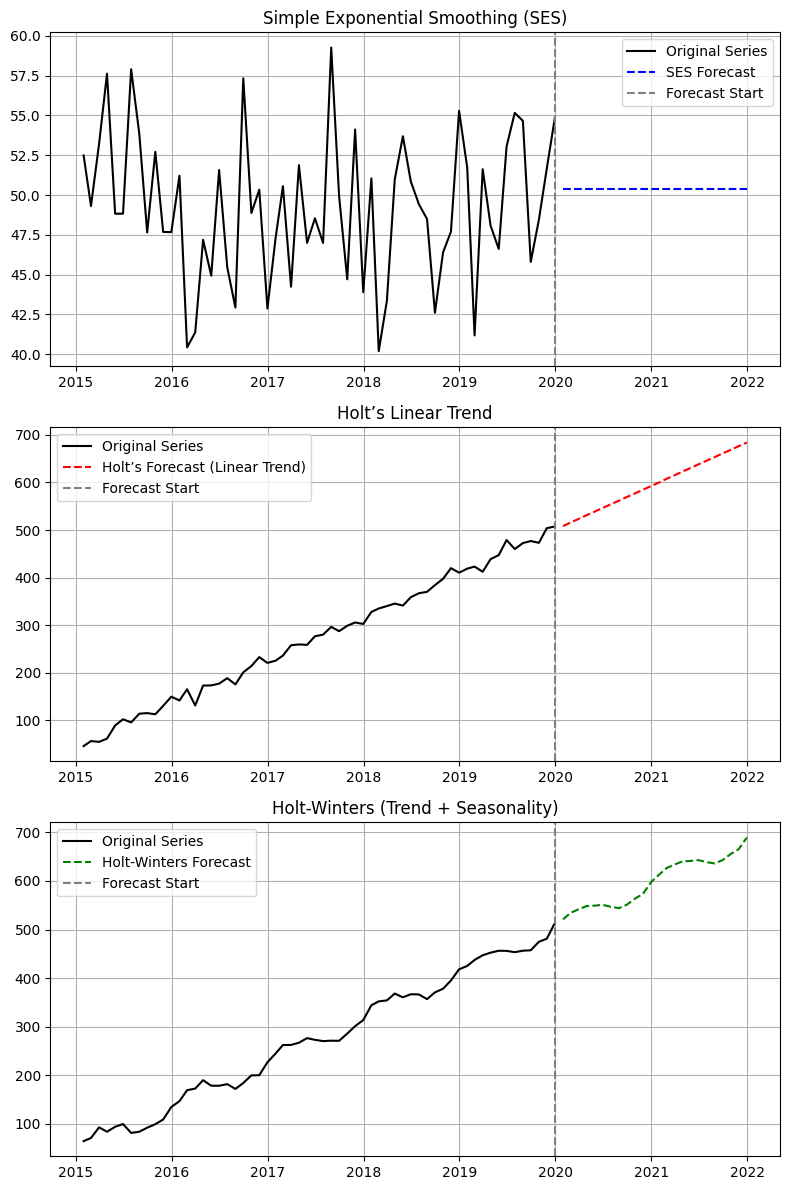

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Set seed for reproducibility
np.random.seed(42)

# Create date range
date_range = pd.date_range(start="2015-01", periods=60, freq="ME")
forecast_horizon = 24
future_dates = pd.date_range(start=date_range[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq="ME")

# --- 1. Simple Exponential Smoothing (SES) ---
ses_data = np.random.normal(50, 5, len(date_range))  # Constant mean + noise
df_ses = pd.DataFrame({"Date": date_range, "Value": ses_data}).set_index("Date")
df_ses.index.freq = "ME"

ses_model = SimpleExpSmoothing(df_ses["Value"]).fit()
ses_forecast = ses_model.forecast(forecast_horizon)

# --- 2. Holt’s Linear Method ---
trend = np.linspace(50, 500, len(date_range))  # Steeper linear trend
holt_data = trend + np.random.normal(0, 10, len(date_range))  # Adding some noise
df_holt = pd.DataFrame({"Value": holt_data}, index=date_range)
df_holt.index.freq = "ME"

holt_model = ExponentialSmoothing(df_holt["Value"], trend="add").fit()
holt_forecast = holt_model.forecast(forecast_horizon)

# --- 3. Holt-Winters (Trend + Seasonality) ---
seasonality = 20 * np.sin(2 * np.pi * date_range.month / 12)
holtwinters_data = trend + seasonality + np.random.normal(0, 5, len(date_range))
df_holtwinters = pd.DataFrame({"Date": date_range, "Value": holtwinters_data}).set_index("Date")
df_holtwinters.index.freq = "ME"

holtwinters_model = ExponentialSmoothing(df_holtwinters["Value"], trend="add", seasonal="add", seasonal_periods=12).fit()
holtwinters_forecast = holtwinters_model.forecast(forecast_horizon)

# --- Plot forecasts ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# SES Plot
axes[0].plot(df_ses.index, df_ses["Value"], label="Original Series", color="black")
axes[0].plot(future_dates, ses_forecast, label="SES Forecast", linestyle="--", color="blue")
axes[0].axvline(df_ses.index[-1], color="gray", linestyle="--", label="Forecast Start")
axes[0].set_title("Simple Exponential Smoothing (SES)")
axes[0].legend()
axes[0].grid()

# Holt’s Linear Trend vs. Holt Damped Trend
axes[1].plot(df_holt.index, df_holt["Value"], label="Original Series", color="black")
axes[1].plot(future_dates, holt_forecast, label="Holt’s Forecast (Linear Trend)", linestyle="--", color="red")
axes[1].axvline(df_holt.index[-1], color="gray", linestyle="--", label="Forecast Start")
axes[1].set_title("Holt’s Linear Trend")
axes[1].legend()
axes[1].grid()

# Holt-Winters Plot
axes[2].plot(df_holtwinters.index, df_holtwinters["Value"], label="Original Series", color="black")
axes[2].plot(future_dates, holtwinters_forecast, label="Holt-Winters Forecast", linestyle="--", color="green")
axes[2].axvline(df_holtwinters.index[-1], color="gray", linestyle="--", label="Forecast Start")
axes[2].set_title("Holt-Winters (Trend + Seasonality)")
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()

### ARIMA

A stationary time series has statistical properties that do not depend on when the series is observed. In general, a time series is stationary if it has no predictable long-term patterns.

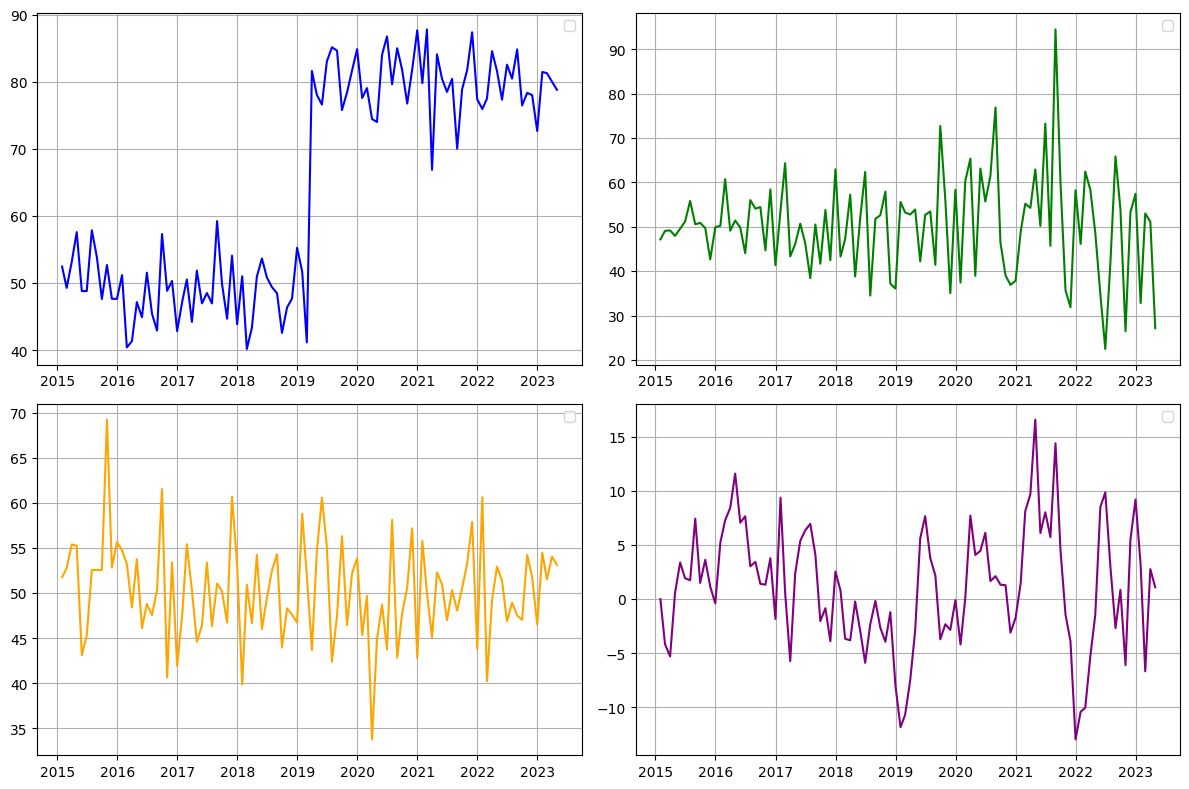

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create a common date range
date_range = pd.date_range(start="2015-01", periods=100, freq="ME")

# --- 1. Time Series with a Change in Level ---
level_change_data = np.concatenate([
    np.random.normal(50, 5, 50),  # First half around 50
    np.random.normal(80, 5, 50)   # Second half shifts to around 80
])
df_level_change = pd.DataFrame({"Value": level_change_data}, index=date_range)

# --- 2. Time Series with Increasing Variance ---
constant_mean = 50  # Fixed mean value
increasing_variance_data = constant_mean + np.random.normal(0, np.linspace(2, 20, len(date_range)))  # Growing noise
# Convert to DataFrame
df_increasing_variance = pd.DataFrame({"Value": increasing_variance_data}, index=date_range)

# --- 3. Stationary Series - White Noise ---
white_noise = np.random.normal(50, 5, len(date_range))
df_white_noise = pd.DataFrame({"Value": white_noise}, index=date_range)

# --- 4. Stationary Series - AR(1) Process ---
phi = 0.6  # Autoregressive coefficient (ensuring stationarity)
ar_process = [0]  # Start with an initial value
for t in range(1, len(date_range)):
    ar_process.append(phi * ar_process[t-1] + np.random.normal(0, 5))  # AR(1) formula
df_ar1 = pd.DataFrame({"Value": ar_process}, index=date_range)

# --- Plot all cases ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Change in Level
axes[0, 0].plot(df_level_change, label="", color="blue")
axes[0, 0].legend()
axes[0, 0].grid()

# Increasing Variance
axes[0, 1].plot(df_increasing_variance, label="", color="green")
axes[0, 1].legend()
axes[0, 1].grid()

# White Noise (Stationary)
axes[1, 0].plot(df_white_noise, label="", color="orange")
axes[1, 0].legend()
axes[1, 0].grid()

# AR(1) Process (Stationary)
axes[1, 1].plot(df_ar1, label="", color="purple")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

A non-stationary time series can be made stationary by “differentiating” it; that is, by calculating the differences between consecutive observations: $$y_t - y_{t-1}$$

Just as a logarithmic transformation can help stabilize the variance of a time series, differentiating a time series can help stabilize its mean, because it can eliminate (or at least reduce) trend and seasonality.

In [78]:
date_range = pd.date_range(start="2023-01-01", periods=12, freq="ME")
sales = np.random.randint(100, 500, size=len(date_range))

df = pd.DataFrame({"date": date_range, "sales": sales}).set_index("date")
df["sales_change"] = df["sales"].diff()
df

,sales,sales_change
date,,
2023-01-31,437,NaN
2023-02-28,385,-52.0
2023-03-31,434,49.0
2023-04-30,446,12.0
2023-05-31,407,-39.0
2023-06-30,348,-59.0
2023-07-31,265,-83.0
2023-08-31,434,169.0
2023-09-30,129,-305.0


When the differenced series is a white noise: $$y_t - y_{t-1} = \epsilon_t$$ then the original series is a "random walk": $$y_t = y_{t-1} + \epsilon_t$$

Random walk models are widely used for non-stationary data, particularly financial and economic data.

The random walk with drift allows a non-zero mean: $$y_t = c + y_{t-1} + \epsilon_t$$

The value of c is the average of the variations between consecutive observations: if it is positive, the series will tend upward (upward drift); if it is negative, downward (downward drift).

Sometimes the differenced series is still non-stationary, so it may be necessary to differentiate a second time to obtain a stationary series. One differentiation may be a seasonal difference, which consists of subtracting from a value the previous value from the same seasonal period.

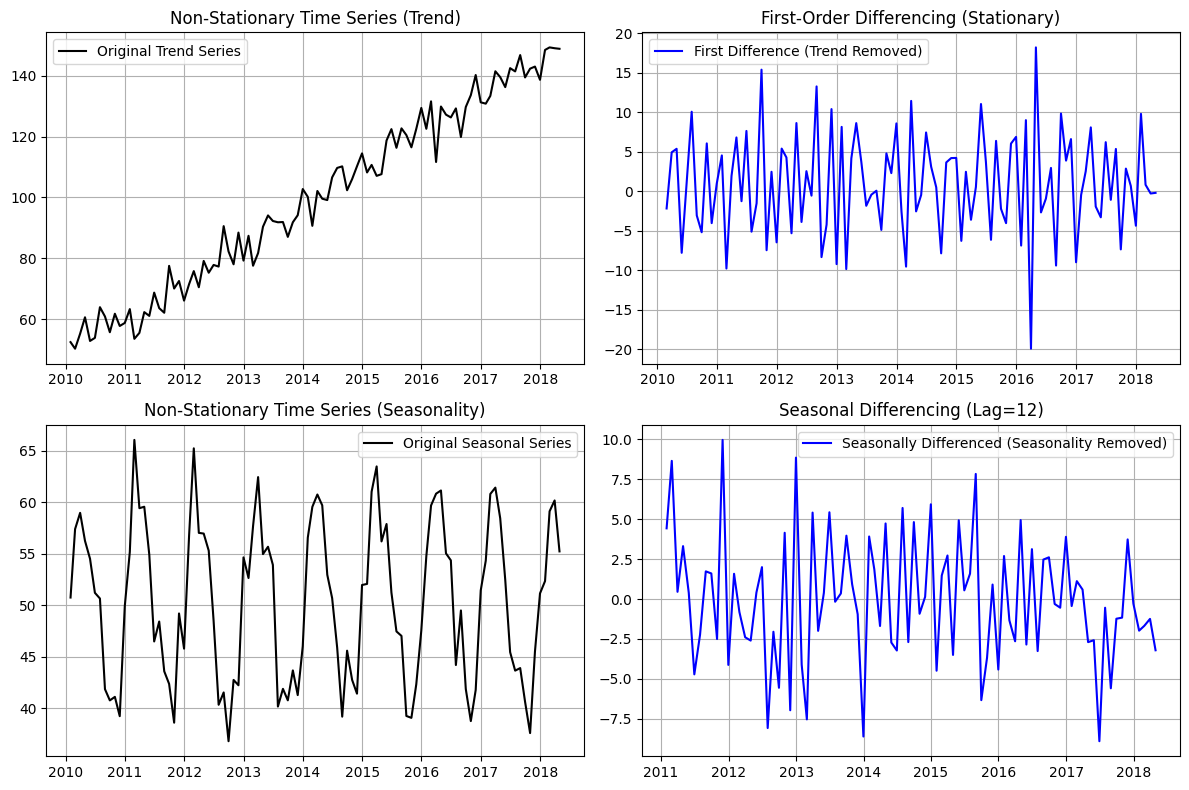

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create a time range
date_range = pd.date_range(start="2010-01", periods=100, freq="ME")

# --- 1. Non-Stationary Series (Trend) ---
trend = np.linspace(50, 150, len(date_range))  # Increasing trend
trend_data = trend + np.random.normal(0, 5, len(date_range))  # Add noise
df_trend = pd.DataFrame({"Value": trend_data}, index=date_range)

# First-order differencing
df_trend_diff = df_trend.diff().dropna()

# --- 2. Non-Stationary Series (Seasonality) ---
seasonality = 10 * np.sin(2 * np.pi * date_range.month / 12)  # Seasonal pattern
seasonal_data = 50 + seasonality + np.random.normal(0, 3, len(date_range))  # Add noise
df_seasonal = pd.DataFrame({"Value": seasonal_data}, index=date_range)

# Seasonal differencing (12-month lag)
df_seasonal_diff = df_seasonal.diff(periods=12).dropna()

# --- Plot the Results ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original trend series
axes[0, 0].plot(df_trend, label="Original Trend Series", color="black")
axes[0, 0].set_title("Non-Stationary Time Series (Trend)")
axes[0, 0].legend()
axes[0, 0].grid()

# Differenced trend series
axes[0, 1].plot(df_trend_diff, label="First Difference (Trend Removed)", color="blue")
axes[0, 1].set_title("First-Order Differencing (Stationary)")
axes[0, 1].legend()
axes[0, 1].grid()

# Original seasonal series
axes[1, 0].plot(df_seasonal, label="Original Seasonal Series", color="black")
axes[1, 0].set_title("Non-Stationary Time Series (Seasonality)")
axes[1, 0].legend()
axes[1, 0].grid()

# Seasonal differencing
axes[1, 1].plot(df_seasonal_diff, label="Seasonally Differenced (Seasonality Removed)", color="blue")
axes[1, 1].set_title("Seasonal Differencing (Lag=12)")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

One way to determine more objectively whether differentiation is needed is to use a unit root test, such as KPSS, where the null hypothesis is that the data are stationary.

Stationary time series can be modeled by ARMA models, formed by the combination of an autoregressive (AR) component and a moving average (MA) component. Autoregressive models predict using a linear combination of past values, while moving-average models using a linear combination of past errors (moving-average models should not be confused with the concept of moving average, which is used to “smooth” a time series).

The ARIMA and SARIMA models are generalizations of the ARMA models to model non-stationary and seasonal time series, respectively.

In [ ]:
%pip install pmdarima==2.0.4 numpy==1.26.4

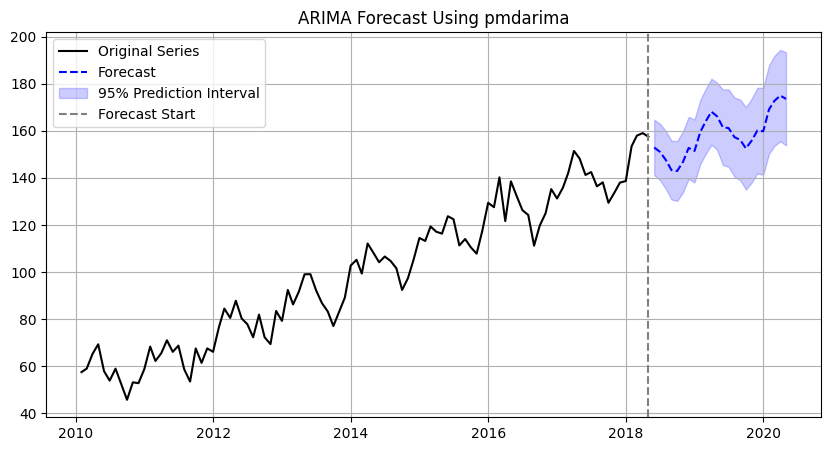

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore")

# --- 1. Generate a Synthetic Time Series ---
np.random.seed(42)
date_range = pd.date_range(start="2010-01", periods=100, freq="ME")
trend = np.linspace(50, 150, len(date_range))  # Upward trend
seasonality = 10 * np.sin(2 * np.pi * date_range.month / 12)  # Annual seasonality
noise = np.random.normal(0, 5, len(date_range))  # Random noise
data = trend + seasonality + noise

df = pd.DataFrame({"Date": date_range, "Value": data}).set_index("Date")

# --- 2. Fit an ARIMA Model Using auto_arima ---
model = pm.auto_arima(df["Value"], 
                      seasonal=True,  # Enable seasonal ARIMA
                      m=12,           # Seasonality of 12 months
                      stepwise=True,  # Efficient search
                      suppress_warnings=True)

# --- 3. Forecast Future Values ---
forecast_horizon = 24
forecast, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)

# --- 4. Create Future Date Range ---
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq="M")

# --- 5. Plot the Results ---
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Value"], label="Original Series", color="black")
plt.plot(future_dates, forecast, label="Forecast", linestyle="--", color="blue")
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color="blue", alpha=0.2, label="95% Prediction Interval")
plt.axvline(df.index[-1], color="gray", linestyle="--", label="Forecast Start")
plt.legend()
plt.title("ARIMA Forecast Using pmdarima")
plt.grid()
plt.show()

## Exercises

1) Given the following dataframe of sales transactions

In [16]:
import pandas as pd
import numpy as np

data = {
    "date": [
        "2023-05-01", "2023-05-02",
        "2023-05-05", "2023-05-07",
        "2023-05-10", "2023-05-15",
        "2023-05-20", "2023-05-25",
        "2023-05-30", "2023-05-31"
    ],
    "sales_amount": [100, 150, 200, 130, 180, 250, 300, 220, 270, 310]
}

df = pd.DataFrame(data)

- create a new column with the number of days since the last sales
- add missing dates, filling missing values for sales_amount with 0
- create a new column with the sale amount of 7 days before
- create a new column with the mean amount of sales for the previous 7 days
- convert the frequency to weekly, summing the sales for each week

2) Given the following sales data

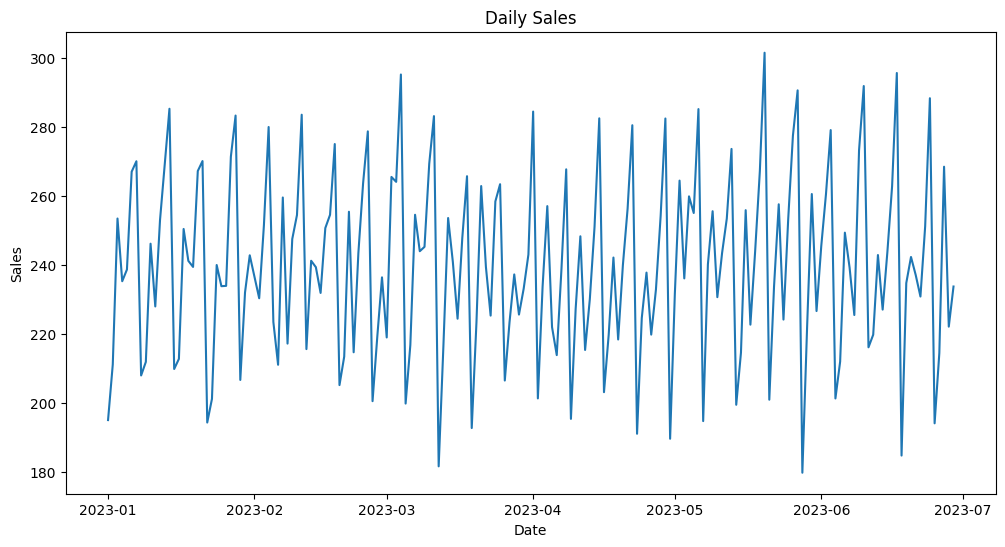

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

date_range = pd.date_range(start="2023-01-01", periods=180, freq="D")
values = np.array([200, 220, 250, 230, 240, 260, 280], dtype=float)
sales = np.tile(values, len(date_range) // 7 + 1)[:len(date_range)]
sales += np.random.normal(0, 10, len(sales))
df = pd.DataFrame({"date": date_range, "sales": sales})
df.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales")
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

Use the appropriate Exponential Smoothing model to forecast sales for the following 7 days.<br>
Bonus: plot the historical data and the generated forecast.